<a href="https://colab.research.google.com/github/kapilsuara/Loan-Defaulter/blob/main/Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.shape #shape of dataset

(255347, 18)

In [ ]:
df.duplicated().sum() #checking for duplicates

0

In [ ]:
df.isnull().sum() #checking for null values

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.info() #describe data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.describe() #describe the data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#EDA

In [ ]:
# List of categorical columns to analyze
categorical_columns = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

# Iterate through each column and calculate the counts, percentages, and averages
for col in categorical_columns:
    print(f"\nAnalysis for {col}:\n")

    # Group by the column and 'Default', then count occurrences
    counts = df.groupby([col, 'Default']).size().unstack(fill_value=0)

    # Calculate total counts for each category
    total_counts = counts.sum(axis=1)

    # Calculate percentages of defaults and non-defaults
    percentages = (counts.div(total_counts, axis=0) * 100).round(2)

    # Add an average column for 'Default' weighted by the counts
    averages = df.groupby(col)['Default'].mean().round(2)

    # Combine counts, percentages, and averages into one table
    summary = counts.copy()
    summary['Total'] = total_counts
    summary['Default %'] = percentages[1] if 1 in percentages.columns else 0
    summary['Non-Default %'] = percentages[0] if 0 in percentages.columns else 0
    # summary['Default Rate (Average)'] = averages

    # Print the summary
    print(summary)



Analysis for Education:

Default          0     1  Total  Default %  Non-Default %
Education                                                
Bachelor's   56577  7789  64366      12.10          87.90
High School  55673  8230  63903      12.88          87.12
Master's     56633  6908  63541      10.87          89.13
PhD          56811  6726  63537      10.59          89.41

Analysis for EmploymentType:

Default             0     1  Total  Default %  Non-Default %
EmploymentType                                              
Full-time       57632  6024  63656       9.46          90.54
Part-time       56484  7677  64161      11.97          88.03
Self-employed   56404  7302  63706      11.46          88.54
Unemployed      55174  8650  63824      13.55          86.45

Analysis for MaritalStatus:

Default            0      1  Total  Default %  Non-Default %
MaritalStatus                                               
Divorced       74376  10657  85033      12.53          87.47
Married        7

we can rank the categories of each variable in descending order of their Default %. Categories with a higher Default % (indicating higher risk) will be assigned lower ordinal values, while categories with lower Default % (indicating lower risk) will be assigned higher ordinal values.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal mapping for each categorical column based on Default %
ordinal_mappings = {
    "Education": {
        "PhD": 1,
        "Master's": 2,
        "Bachelor's": 3,
        "High School": 4
    },
    "EmploymentType": {
        "Full-time": 1,
        "Self-employed": 2,
        "Part-time": 3,
        "Unemployed": 4
    },
    "MaritalStatus": {
        "Married": 1,
        "Single": 2,
        "Divorced": 3
    },
    "HasMortgage": {
        "Yes": 1,
        "No": 2
    },
    "HasDependents": {
        "Yes": 1,
        "No": 2
    },
    "LoanPurpose": {
        "Home": 1,
        "Other": 2,
        "Education": 3,
        "Auto": 4,
        "Business": 5
    },
    "HasCoSigner": {
        "Yes": 1,
        "No": 2
    }
}

# Apply the ordinal mappings to the dataset
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

# Display the first few rows of the updated DataFrame
df.head


<bound method NDFrame.head of             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0                    4         15.23        36      0.44          3   
1                    1          4.81        60      0.68          2   
2                    3         21.17        24      0.31          2   
3                    3          7.07        24      0.23          4   
4                    4          6.51        48      0.73          3   
...                ...           ...       ...       ...        ...   
255342               4         14.11        12      0.85          3   
255343               2         11.55        24      0.21          4   
255344               3          5.29        60      0.50          4   
255345               1         20.90        48      0.44          4   
255346               2          6.73        12      0.48          3   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
0                    1              3            1              1   
1                    1              1            2              2   
2                    4              3            1              1   
3                    1              1            2              2   
4                    4              3            2              1   
...                ...            ...          ...            ...   
255342               1              1            2              2   
255343               3              3            2              2   
255344               2              1            1              1   
255345               3              2            1              1   
255346               4              3            1              2   

        LoanPurpose  HasCoSigner  Default  
0                 2            1        0  
1                 2            1        0  
2                 4            2        1  
3                 5            2        0  
4                 4            2        0  
...             ...          ...      ...  
255342            2            2        0  
255343            1            2        1  
255344            4            1        0  
255345            2            2        0  
255346            3            1        0  

[255347 rows x 18 columns]>

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,3,1,3,1,1,2,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,1,1,2,2,2,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,4,3,1,1,4,2,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,4,1,1,2,2,5,2,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,3,4,3,2,1,4,2,0


In [ ]:
df = df.drop(["LoanID"],axis=1)

In [ ]:
# Convert columns based on their current data type
for col in df.columns:
    if col != "Default":  # Skip the 'Default' column
        if df[col].dtype == "float64":
            df[col] = df[col].astype("float")  # Ensure float columns are float
        elif df[col].dtype == "int64":
            df[col] = df[col].astype("int")  # Ensure int columns are int
        elif df[col].dtype == "object":
            # Convert object columns (except Default) to int32
            df[col] = df[col].astype("int32")

# Display the data types of the updated DataFrame
print(df.dtypes)

# Display the first few rows of the updated DataFrame
print(df.head())


Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15

In [ ]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,3,1,3,1,1,2,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,1,1,2,2,2,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,4,3,1,1,4,2,1
3,32,31713,44799,743,0,3,7.07,24,0.23,4,1,1,2,2,5,2,0
4,60,20437,9139,633,8,4,6.51,48,0.73,3,4,3,2,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,3,1,1,2,2,2,2,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,4,3,3,2,2,1,2,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,4,2,1,1,1,4,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,4,3,2,1,1,2,2,0


<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


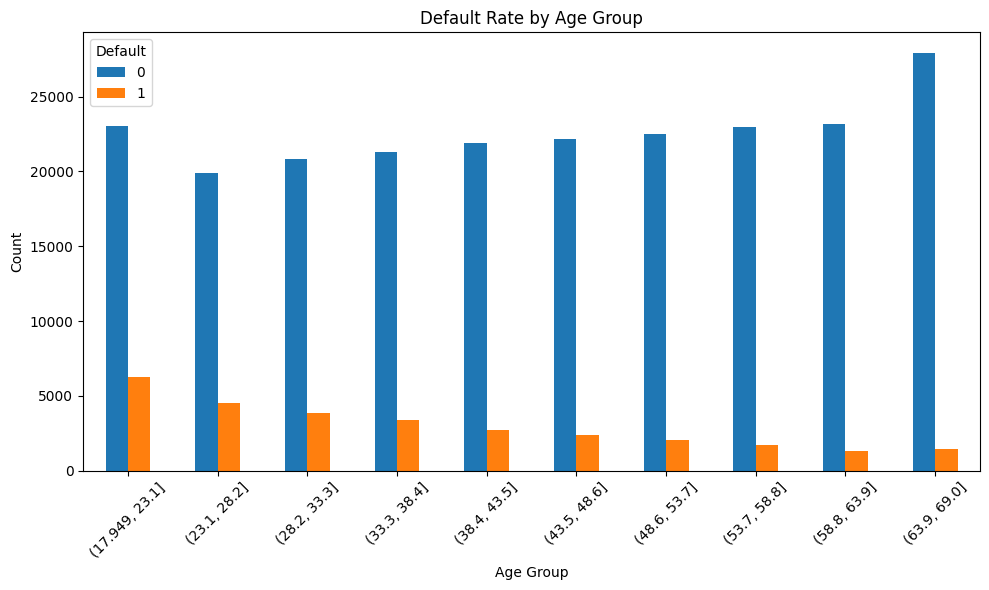

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


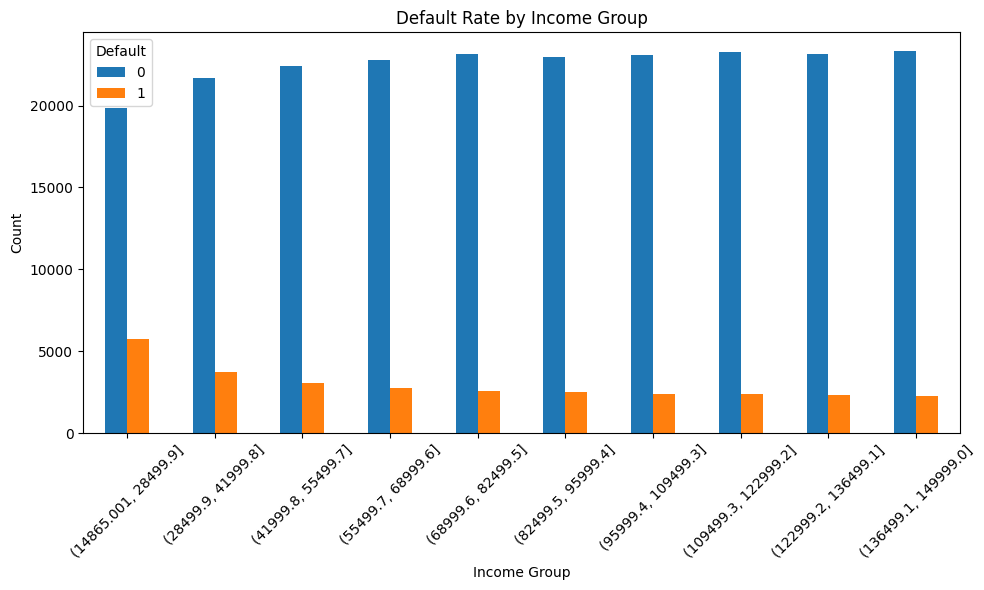

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


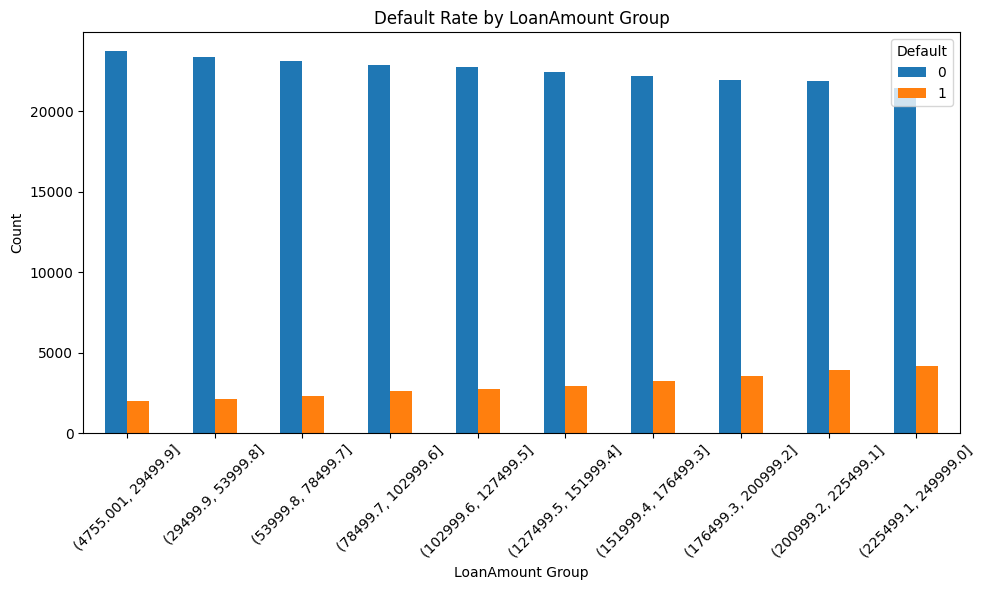

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


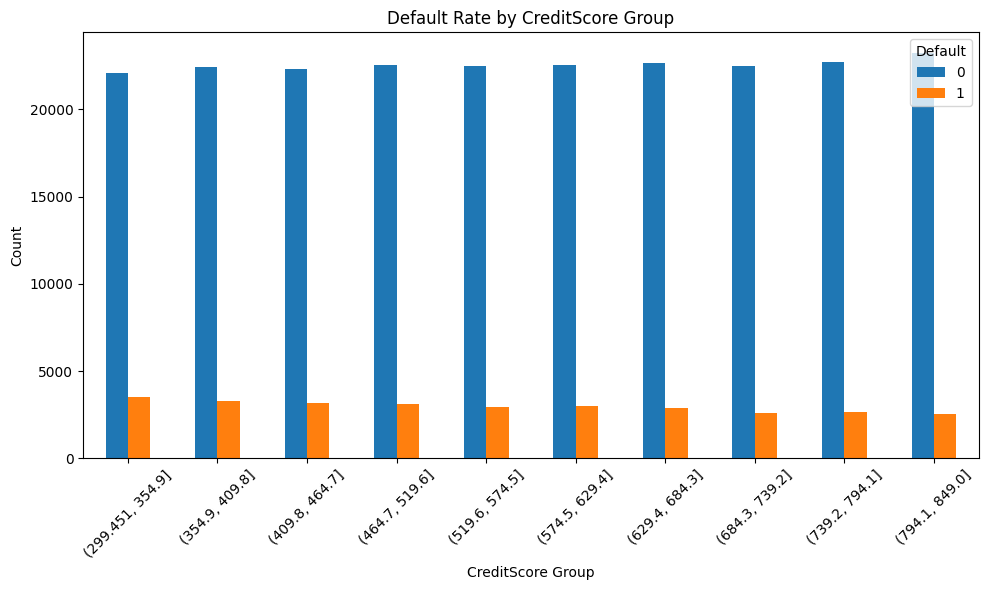

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


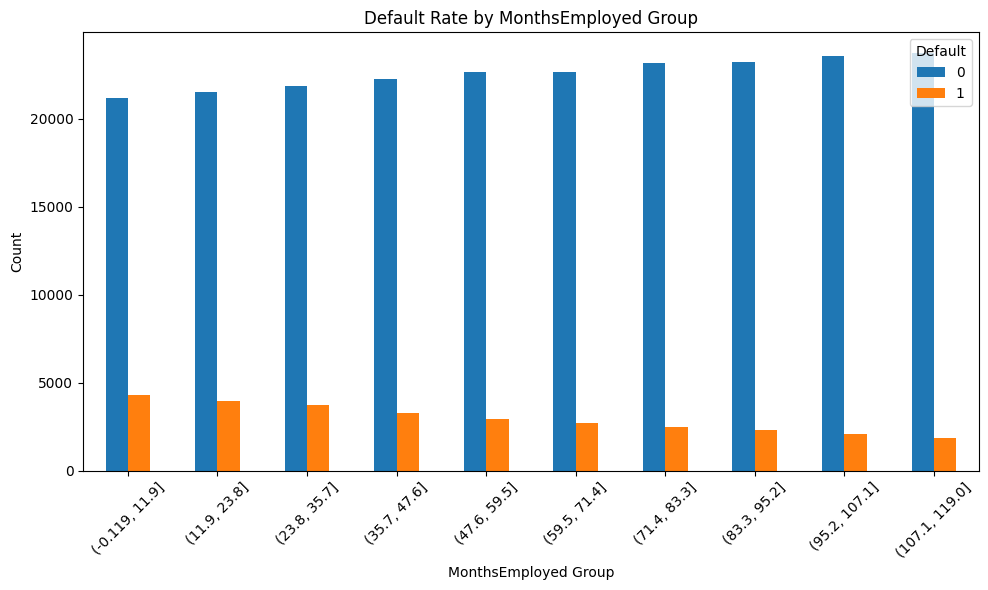

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


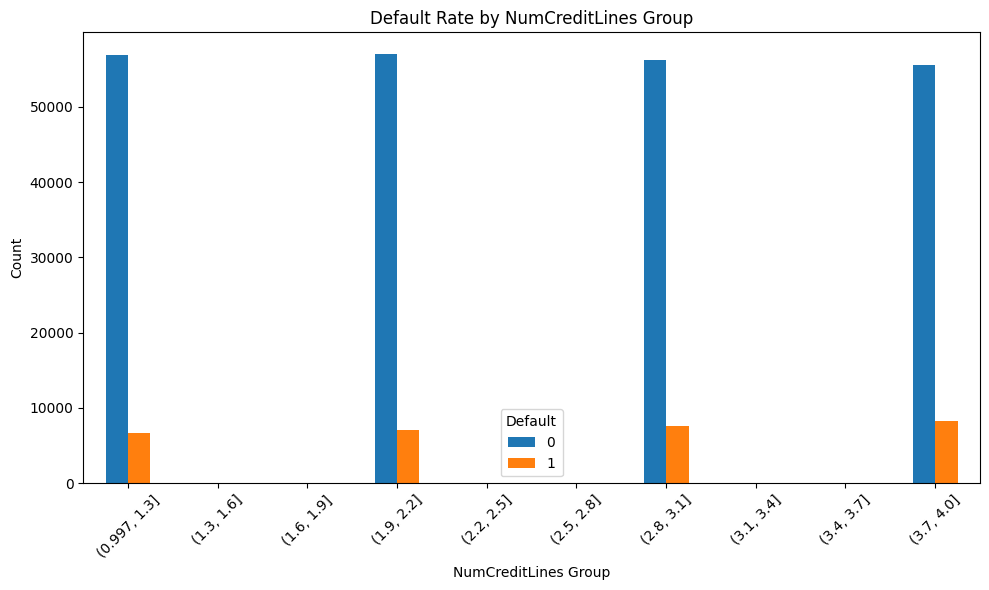

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


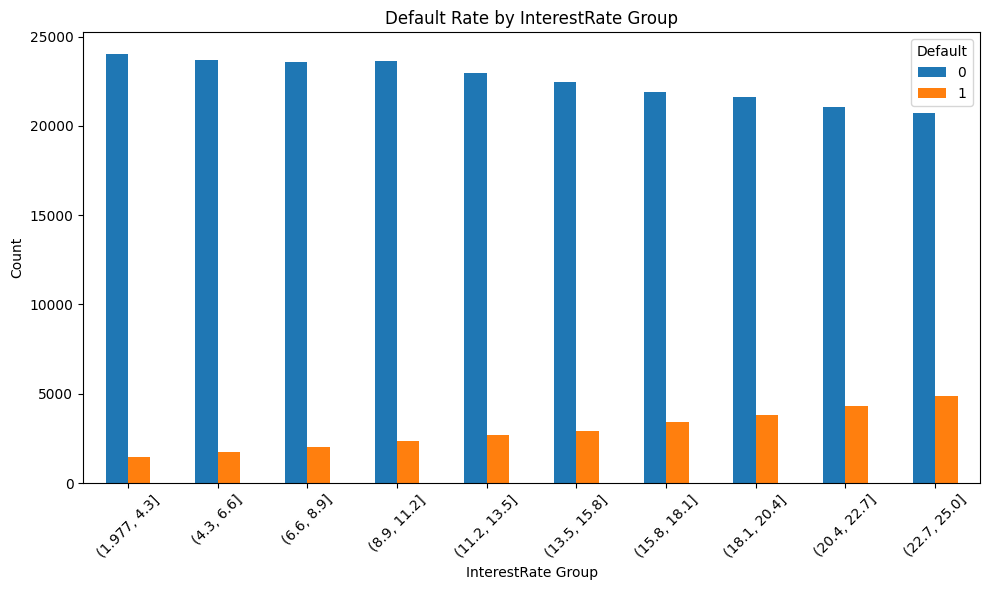

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


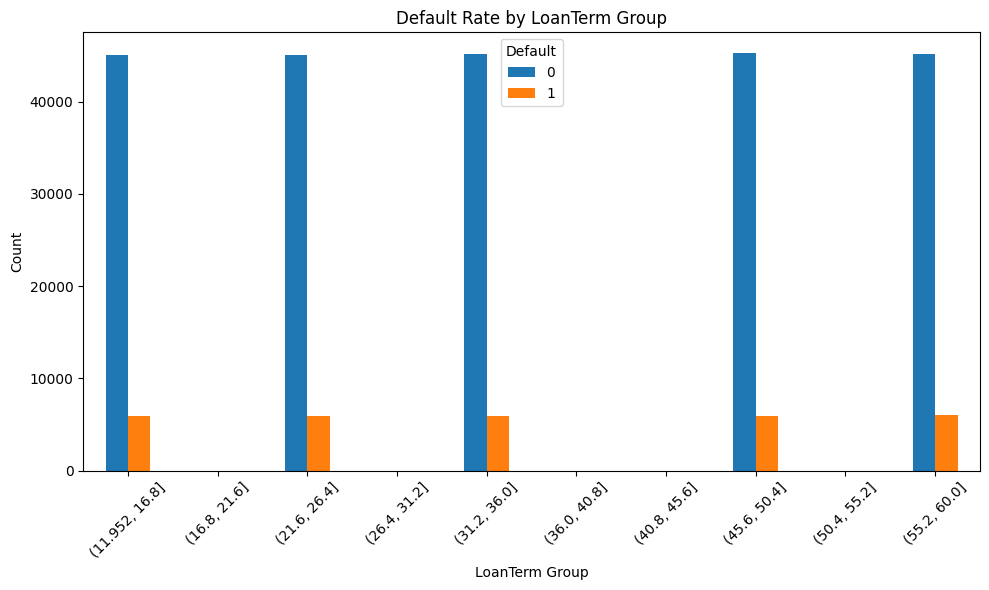

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


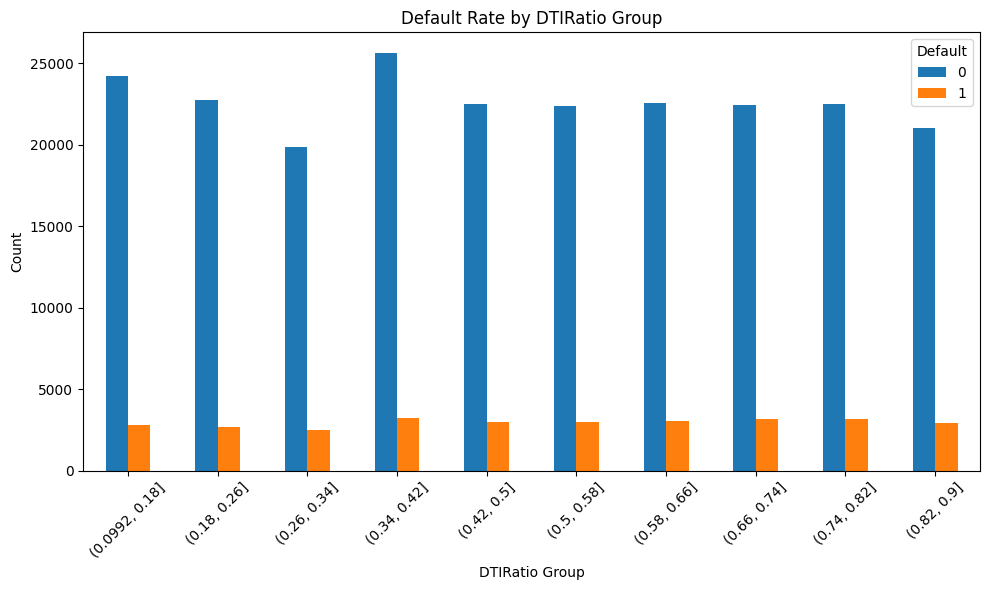

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


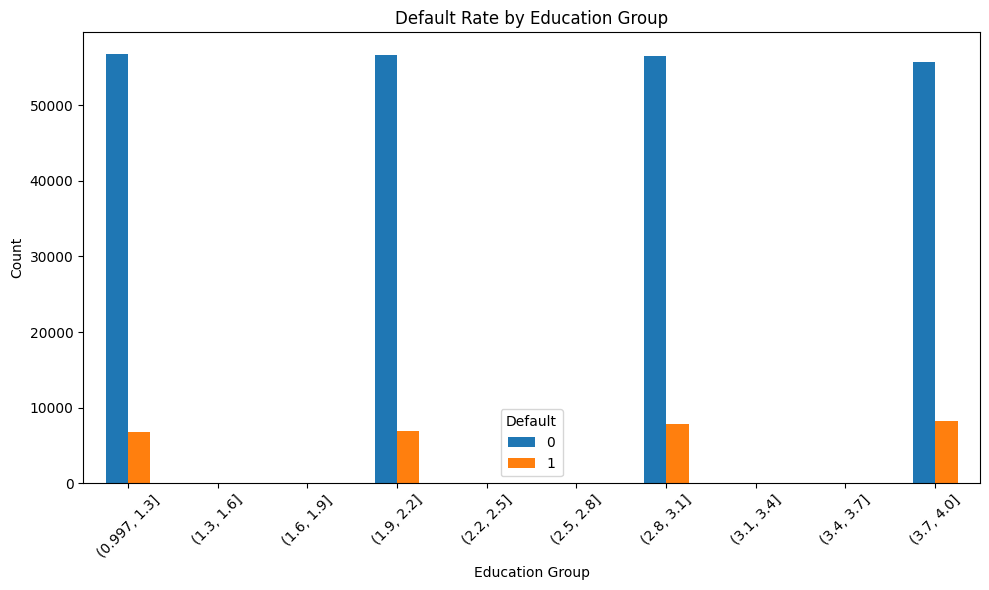

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


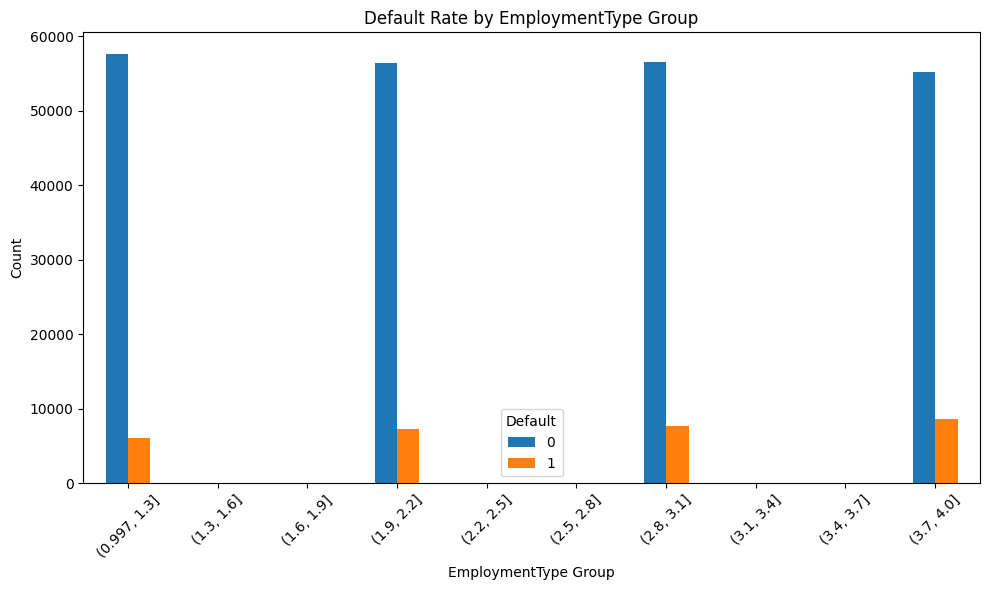

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


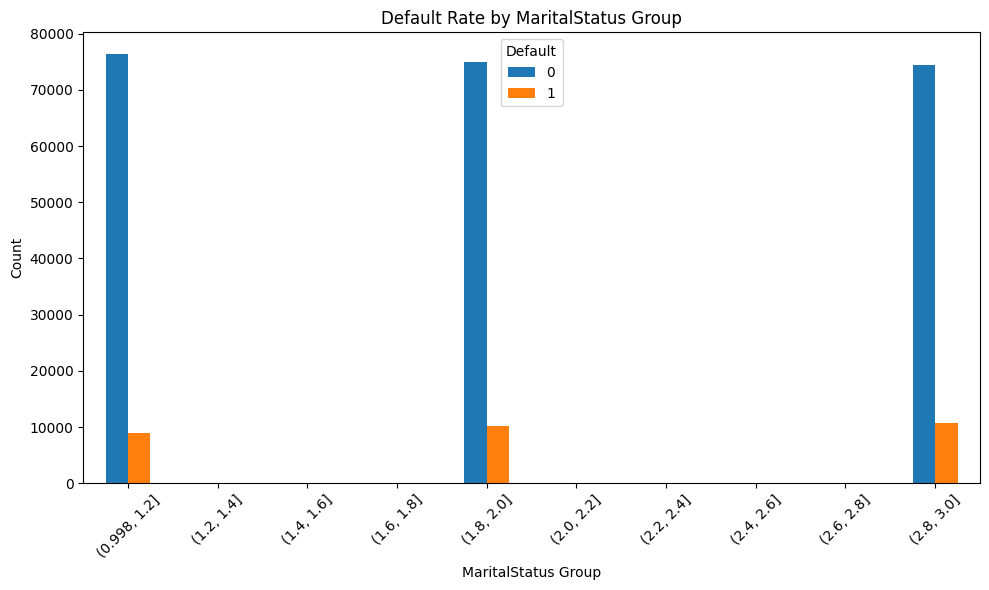

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


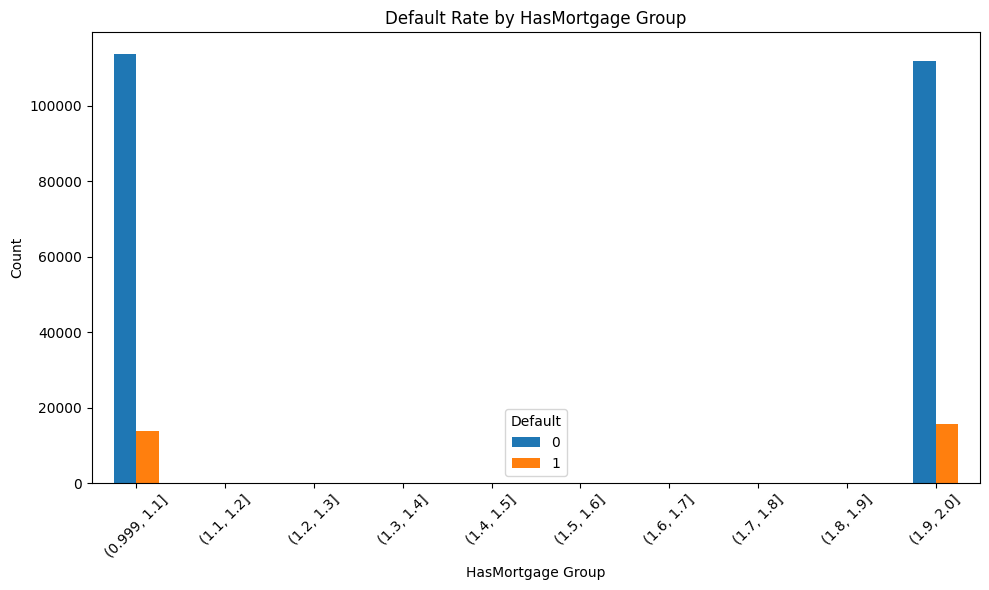

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


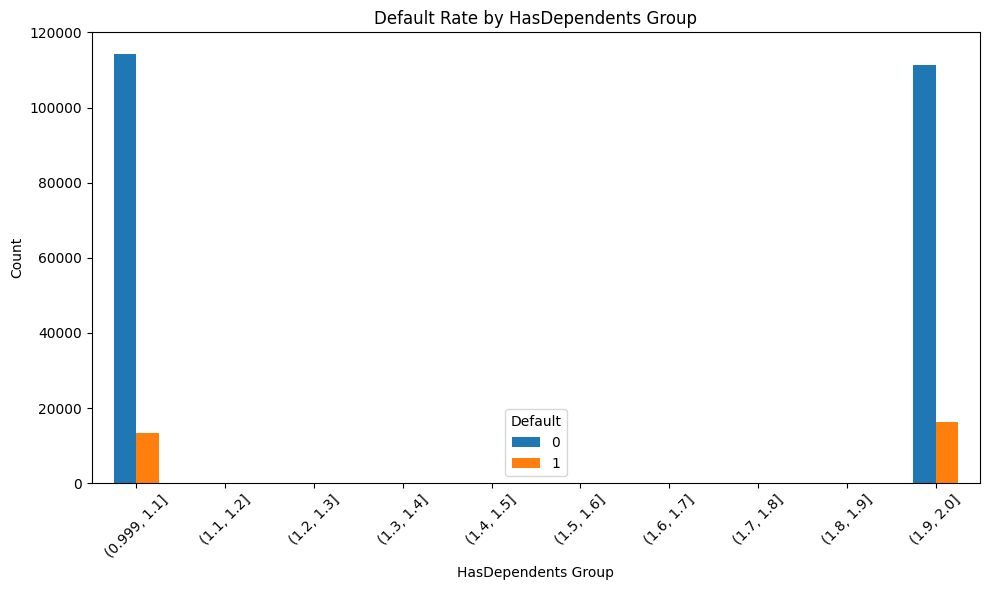

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


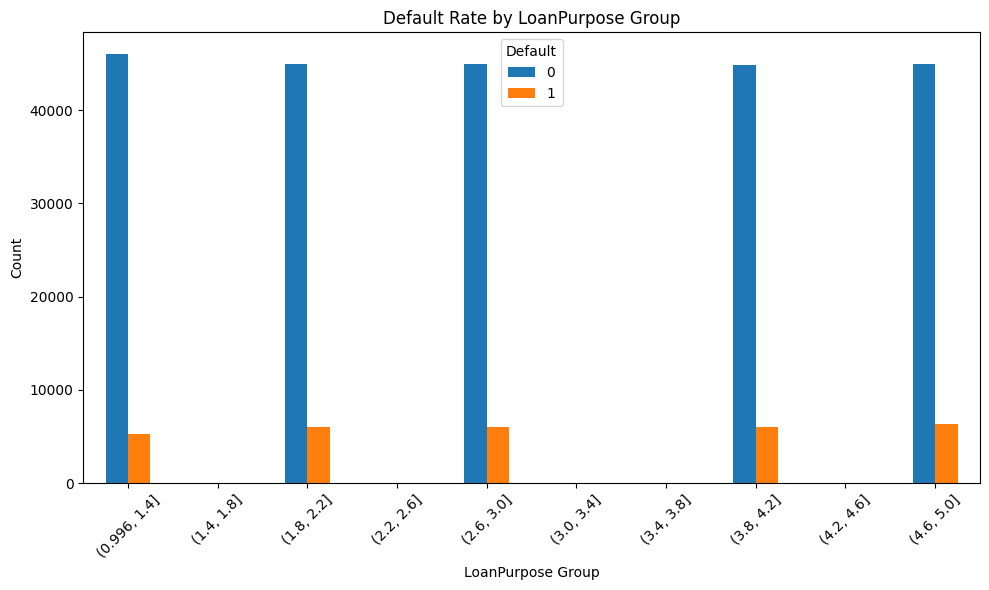

<ipython-input-253-834a1100b54d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()


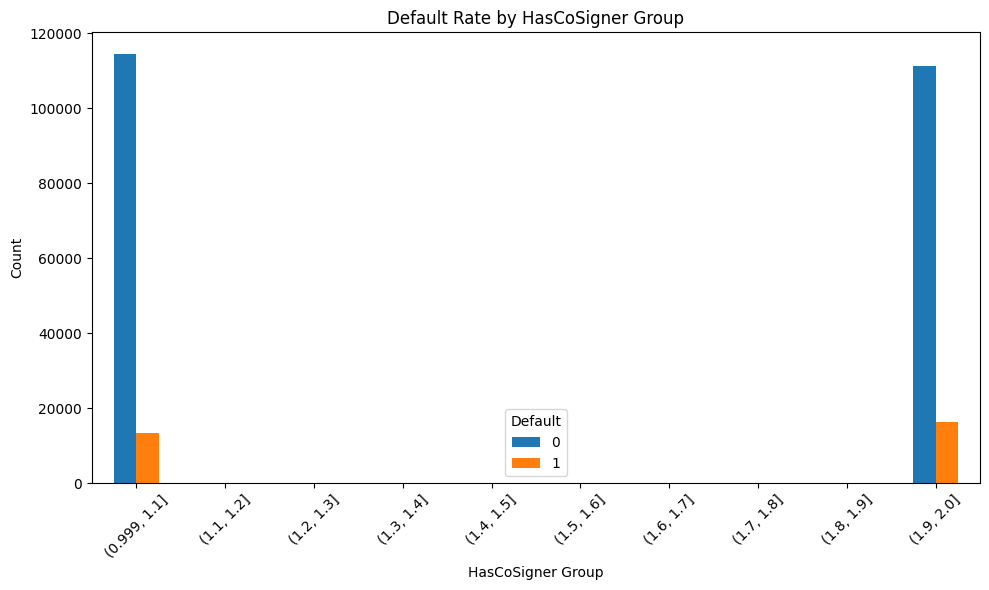

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Default column is categorical if not already
df['Default'] = df['Default'].astype('category')

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Bar chart: Numerical columns vs Default with bins
for col in numerical_columns:
    if col != 'Default':
        df[f'{col}_Group'] = pd.cut(df[col], bins=10)
        col_default_counts = df.groupby(f'{col}_Group')['Default'].value_counts().unstack()
        col_default_counts.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Default Rate by {col} Group')
        plt.xlabel(f'{col} Group')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Default')
        plt.tight_layout()
        plt.show()





<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


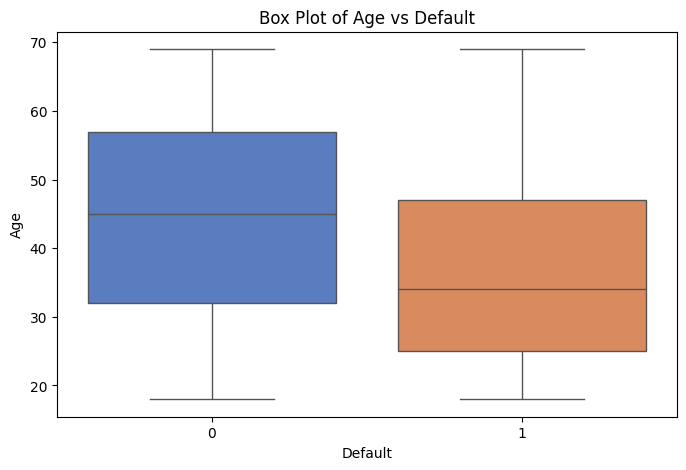

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


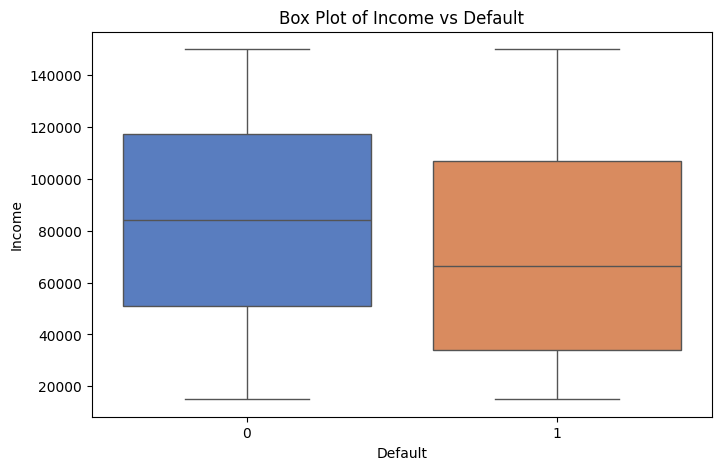

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


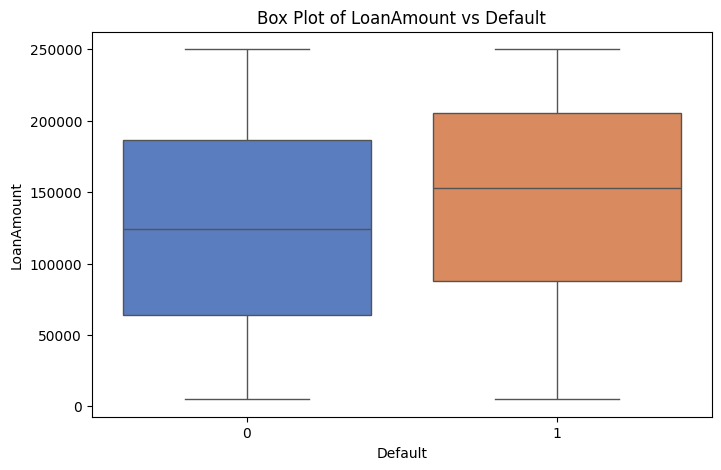

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


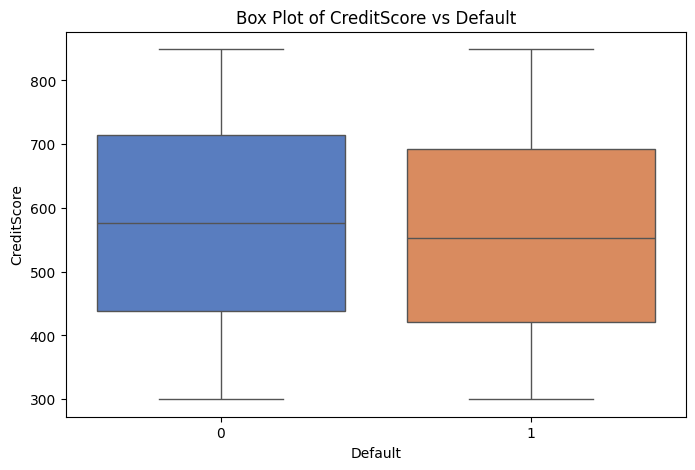

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


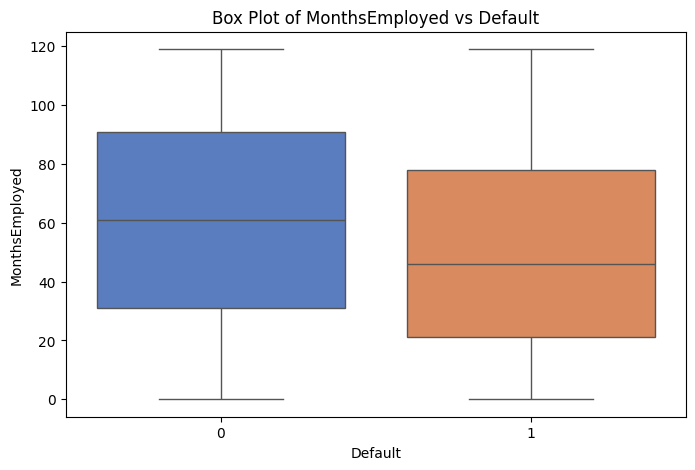

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


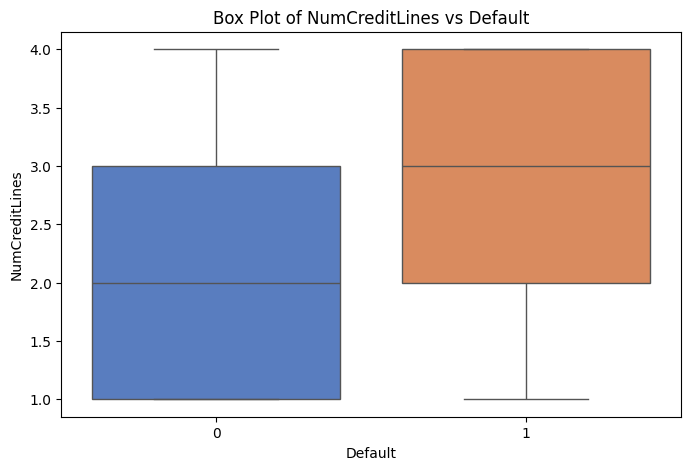

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


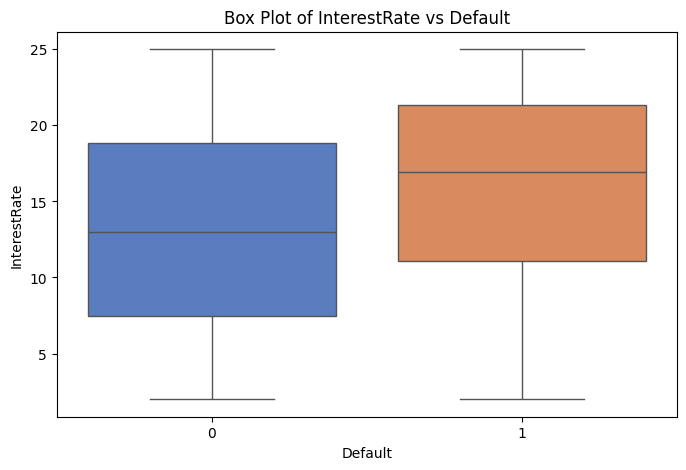

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


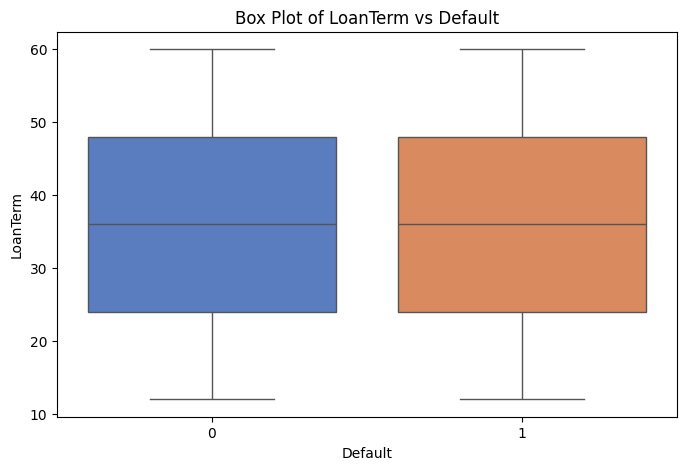

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


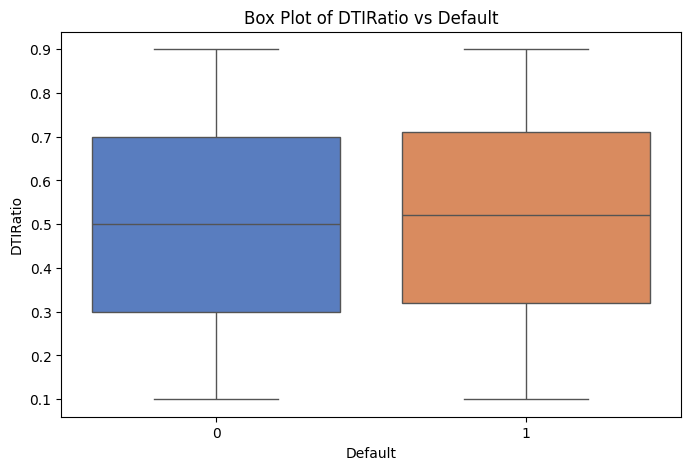

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


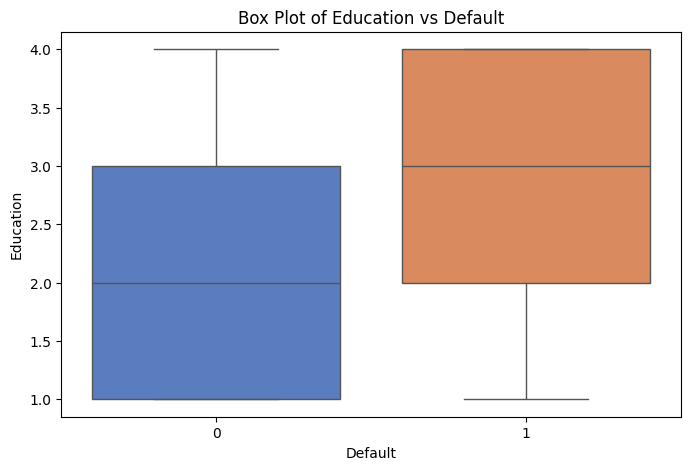

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


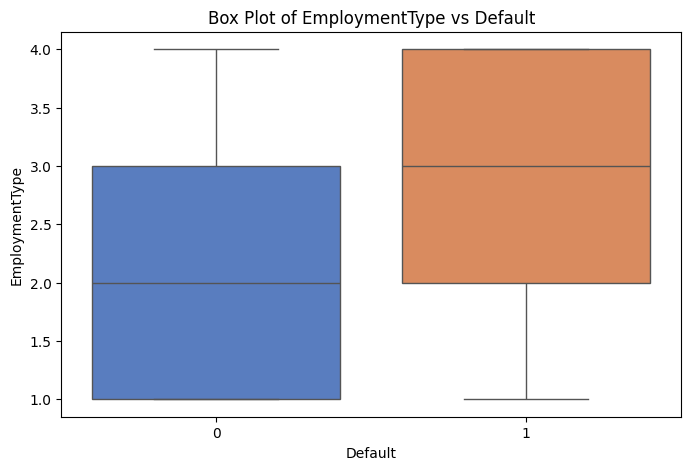

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


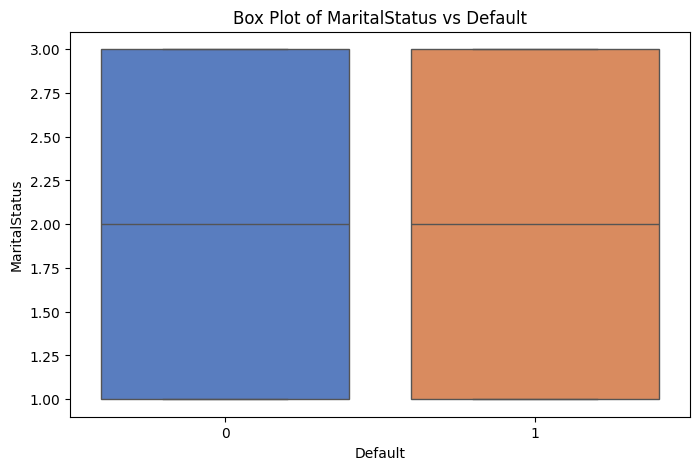

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


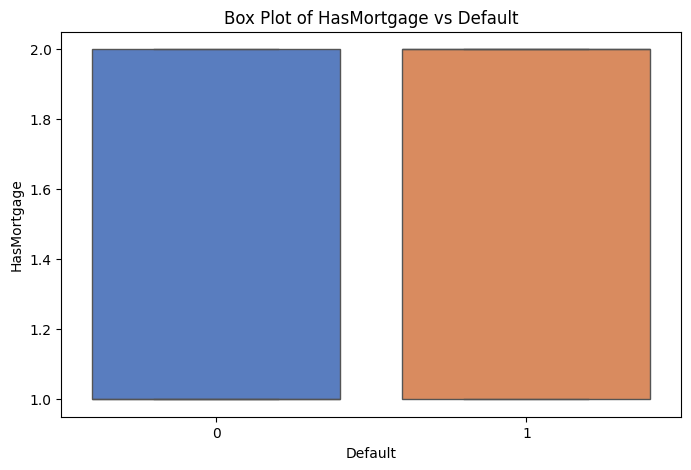

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


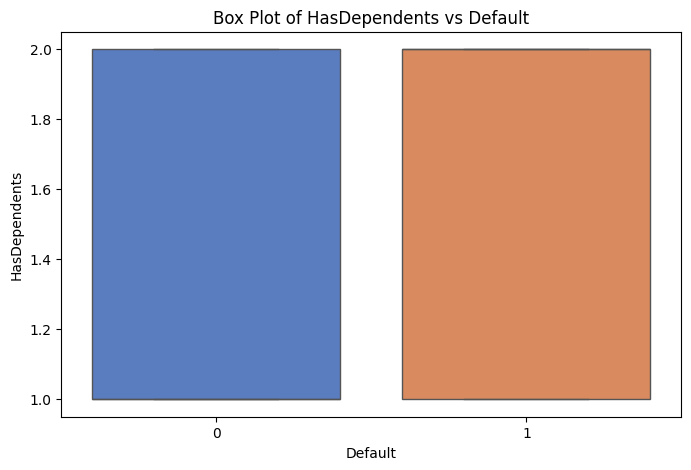

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


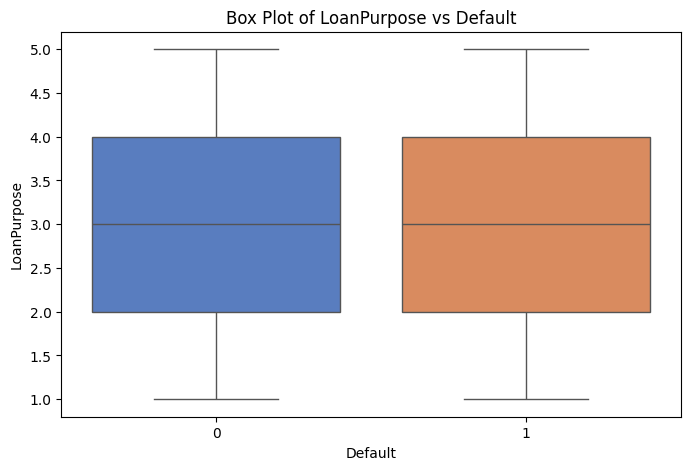

<ipython-input-254-33d9ab553b6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Default', y=col, palette='muted')


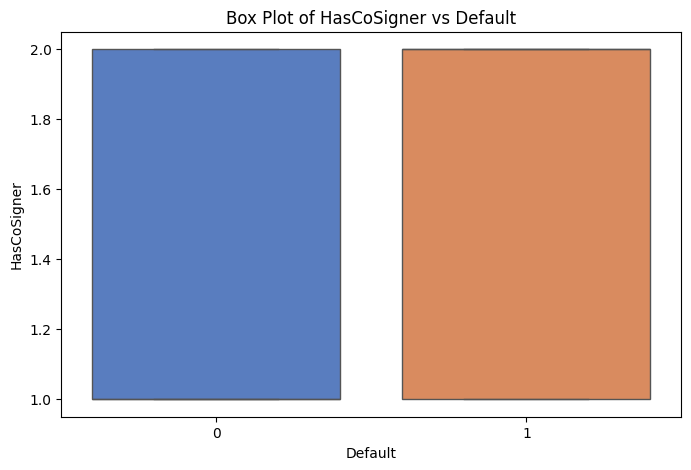

In [ ]:
# Box Plot for numerical columns
for col in numerical_columns:
    if col != 'Default':
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='Default', y=col, palette='muted')
        plt.title(f'Box Plot of {col} vs Default')
        plt.xlabel('Default')
        plt.ylabel(col)
        plt.show()

In [ ]:
!pip install icecream

ic| correlation_matrix*100:                        Age      Income  LoanAmount  CreditScore  \
                            Age             100.000000    1.691559   -1.873080     0.745764   
                            Income            1.691559  100.000000   -7.314640     0.193990   
                            LoanAmount       -1.873080   -7.314640  100.000000    -0.093005   
                            CreditScore       0.745764    0.193990   -0.093005   100.000000   
                            MonthsEmployed    2.868156    0.644382   -0.633302     0.445038   
                            NumCreditLines   -0.570014   -0.528146    0.244139    -0.465544   
                            InterestRate     -3.559286   -0.991700    0.640243    -0.611672   
                            LoanTerm         -0.506006   -0.061497   -0.426172     0.218535   
                            DTIRatio         -0.477038   -0.333392    0.359447     0.135639   
                            Education        -0.66

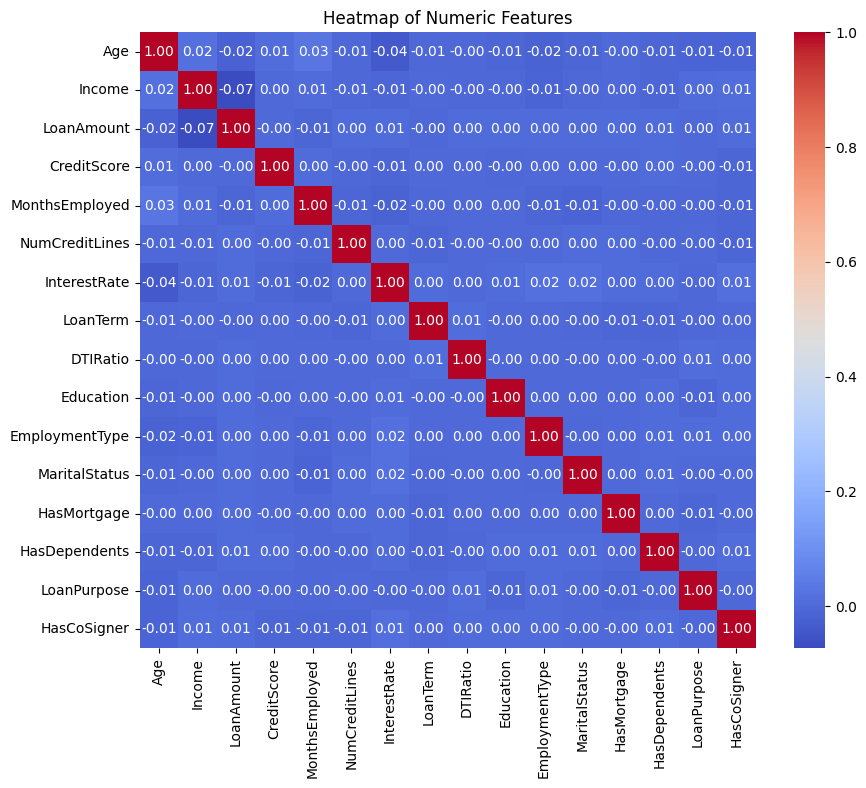

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from icecream import ic

# Load the DataFrame (already done as df)
# df = your loaded DataFrame

# Select only numeric (int and float) columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

ic(correlation_matrix*100)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numeric Features')
plt.show()


In [ ]:
df["Default"].value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
# imbalance dattaset
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Default'] == 0]
minority_class = df[df['Default'] == 1]

# Perform undersampling
majority_class_downsampled = resample(
    majority_class,
    replace=False,              # Do not replace samples
    n_samples=len(minority_class),  # Match minority class size
    random_state=42             # For reproducibility
)

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the dataset to mix classes properl
df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution after undersampling
print(f"Class distribution after undersampling:\n{undersampled_df['Default'].value_counts()}")




Class distribution after undersampling:
Default
0    29653
1    29653
Name: count, dtype: int64


In [ ]:
# from sklearn.model_selection import train_test_split

# # Define features (X) and target (y)
# X = df.drop(columns=["Default"])  # Drop the target column from features
# y = df["Default"]  # Target variable

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Display the shapes of the split datasets
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")


In [ ]:
# # Display the shapes of the split datasets
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")

In [ ]:
# Drop any columns with '_Group' from the dataset
X = X.drop(columns=[col for col in X.columns if '_Group' in col], errors='ignore')

# Ensure the training and testing datasets are numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Dictionary to store results
results = {}

# Loop through each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Classification report
    class_report = classification_report(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix,
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("\nClassification Report:")
    print(metrics['Classification Report'])
    print("\nConfusion Matrix:")
    print(metrics['Confusion Matrix'])


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree...
Training SVM...
Training Naive Bayes...

Model: Logistic Regression
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      5931
           1       0.68      0.70      0.69      5931

    accuracy                           0.69     11862
   macro avg       0.69      0.69      0.69     11862
weighted avg       0.69      0.69      0.69     11862


Confusion Matrix:
[[3994 1937]
 [1799 4132]]

Model: Decision Tree
Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      5931
           1       0.59      0.57      0.58      5931

    accuracy                           0.58     11862
   macro avg       0.58      0.58      0.58     11862
weighted avg       0.58      0.58      0.58     11862


Confusion Matrix:
[[3526 2405]
 [2528 3403]]

Model: SVM
Accuracy: 0.58

Classification Report:
         